In [1]:
# windows only hack for graphviz path 
import os
for path in os.environ['PATH'].split(os.pathsep):
    if path.endswith("Library\\bin"):
        os.environ['PATH']+=os.pathsep+os.path.join(path, 'graphviz')

In [2]:
import keras
from keras.models import Sequential
from PIL import Image
import numpy as np

Using TensorFlow backend.


In [3]:
import keras.backend as K
# 設定 channels first
K.set_image_data_format('channels_last')

In [4]:
# 第一次使用時，系統會下載權重，會需要一點時間
pretrained = keras.applications.vgg16.VGG16()

In [5]:
pretrained

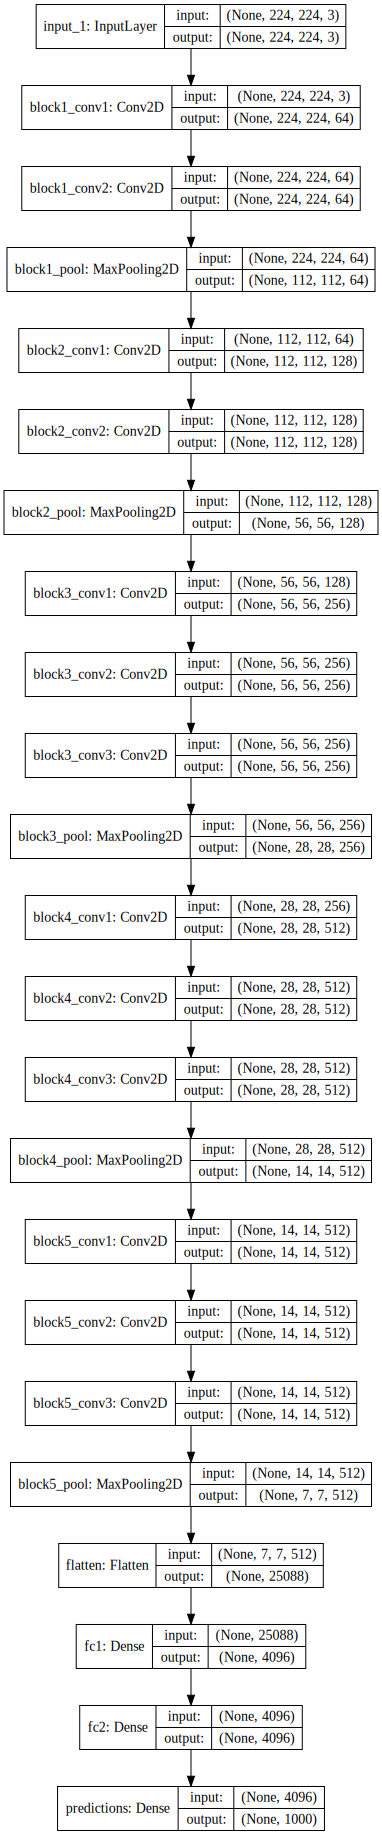

In [6]:
# 看一下網路的樣子
from IPython.display import SVG, display
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(pretrained, show_shapes=True).create(prog='dot', format='svg'))

### 看一下 imagenet 的分類

In [7]:
from keras.applications import imagenet_utils

In [8]:
imagenet_utils.CLASS_INDEX_PATH

'https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json'

In [9]:
from urllib.request import urlopen
import json
with urlopen(imagenet_utils.CLASS_INDEX_PATH) as jsonf:
    data = jsonf.read()

In [10]:
class_dict = json.loads(data.decode())
[class_dict[str(i)][1] for i in range(1000)]

['tench',
 'goldfish',
 'great_white_shark',
 'tiger_shark',
 'hammerhead',
 'electric_ray',
 'stingray',
 'cock',
 'hen',
 'ostrich',
 'brambling',
 'goldfinch',
 'house_finch',
 'junco',
 'indigo_bunting',
 'robin',
 'bulbul',
 'jay',
 'magpie',
 'chickadee',
 'water_ouzel',
 'kite',
 'bald_eagle',
 'vulture',
 'great_grey_owl',
 'European_fire_salamander',
 'common_newt',
 'eft',
 'spotted_salamander',
 'axolotl',
 'bullfrog',
 'tree_frog',
 'tailed_frog',
 'loggerhead',
 'leatherback_turtle',
 'mud_turtle',
 'terrapin',
 'box_turtle',
 'banded_gecko',
 'common_iguana',
 'American_chameleon',
 'whiptail',
 'agama',
 'frilled_lizard',
 'alligator_lizard',
 'Gila_monster',
 'green_lizard',
 'African_chameleon',
 'Komodo_dragon',
 'African_crocodile',
 'American_alligator',
 'triceratops',
 'thunder_snake',
 'ringneck_snake',
 'hognose_snake',
 'green_snake',
 'king_snake',
 'garter_snake',
 'water_snake',
 'vine_snake',
 'night_snake',
 'boa_constrictor',
 'rock_python',
 'Indian_cobr

Imagenet 2012 網頁

http://image-net.org/challenges/LSVRC/2012/signup

資料下載

http://academictorrents.com/browse.php?search=imagenet

一千張圖片

https://www.dropbox.com/s/vippynksgd8c6qt/ILSVRC2012_val_1000.tar?dl=0

In [11]:
# 下載 圖片
import os
import urllib
from urllib.request import urlretrieve
dataset = 'ILSVRC2012_val_1000.tar'
def reporthook(a,b,c):
    print("\rdownloading: %5.1f%%"%(a*b*100.0/c), end="")
    
if not os.path.isfile(dataset):
        origin = "https://www.dropbox.com/s/vippynksgd8c6qt/ILSVRC2012_val_1000.tar?dl=1"
        print('Downloading data from %s' % origin)
        urlretrieve(origin, dataset, reporthook=reporthook)

downloading: 100.0%

In [12]:
# 解開圖片
from tarfile import TarFile
tar = TarFile(dataset)
tar.extractall()

In [13]:
# 讀取圖片
from PIL import Image as pimage
from glob import glob
imgs = []
files = list(glob('ILSVRC2012_img_val/ILSVRC2012_val_*.JPEG'))
for fn in files:
    img = pimage.open(fn)
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img = np.array(img.resize((224,224)))    
    imgs.append(img)
imgs = np.array(imgs)

In [14]:
# 準備資料，轉成通用的格式(扣掉顏色的中間值)
p_imgs = imagenet_utils.preprocess_input(np.float32(imgs))
del imgs

In [ ]:
# 實際
predictions = pretrained.predict(p_imgs)

In [ ]:
# 對應編碼
results = imagenet_utils.decode_predictions(predictions)

In [ ]:
from IPython.display import Image, HTML, display
for fn, res in zip(files[:100], results[:100]):
    res_text = "".join("<li>{:05.2f}% : {}</li>".format(x[2]*100, x[1]) for x in res)
    display(HTML("""
    <table><tr>
    <td><img width=200 src="{}" /></td>
    <td><ul>{}</ul></td>
    </tr>
    </table>
    """.format(fn, res_text)))    